In [48]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:

import plate_layout as pl
import pandas as pd
import numpy as np
import logging

pl.logger.setLevel(logging.INFO)

## Create a plate layout 
Create plate design by specifying the path to a config file directly when instantiating the class, 

In [50]:
pl.Plate("./config/plate_config.toml")

[    INFO] --- Successfully loaded config file ./config/plate_config.toml
[    INFO] --- Created a plate with 96 wells: 
 [['H11' 'H10' 'H9' 'H8' 'H7' 'H6' 'H5' 'H4' 'H3' 'H2' 'H1' 'H0']
 ['G11' 'G10' 'G9' 'G8' 'G7' 'G6' 'G5' 'G4' 'G3' 'G2' 'G1' 'G0']
 ['F11' 'F10' 'F9' 'F8' 'F7' 'F6' 'F5' 'F4' 'F3' 'F2' 'F1' 'F0']
 ['E11' 'E10' 'E9' 'E8' 'E7' 'E6' 'E5' 'E4' 'E3' 'E2' 'E1' 'E0']
 ['D11' 'D10' 'D9' 'D8' 'D7' 'D6' 'D5' 'D4' 'D3' 'D2' 'D1' 'D0']
 ['C11' 'C10' 'C9' 'C8' 'C7' 'C6' 'C5' 'C4' 'C3' 'C2' 'C1' 'C0']
 ['B11' 'B10' 'B9' 'B8' 'B7' 'B6' 'B5' 'B4' 'B3' 'B2' 'B1' 'B0']
 ['A11' 'A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1' 'A0']]
[    INFO] --- Setting up QC scheme from config file
[    INFO] --- Distributing specimen and QC samples on plate 
[    INFO] --- 
	[['PB_1' 'EC_1' 'S_1' 'S_2' 'S_3' 'S_4' 'S_5' 'S_6' 'S_7' 'S_8' 'S_9' 'S_10']
 ['S_11' 'PO_1' 'EC_2' 'S_12' 'S_13' 'S_14' 'S_15' 'S_16' 'S_17' 'S_18' 'S_19' 'S_20']
 ['S_21' 'S_22' 'PB_2' 'EC_3' 'S_23' 'S_24' 'S_25' 'S_26' 'S

or use the methods

[    INFO] --- Run method 'load_config_file(<path to config toml file)' to define the plate setup
[    INFO] --- Successfully loaded config file ./config/plate_config.toml
[    INFO] --- Created a plate with 96 wells: 
 [['H11' 'H10' 'H9' 'H8' 'H7' 'H6' 'H5' 'H4' 'H3' 'H2' 'H1' 'H0']
 ['G11' 'G10' 'G9' 'G8' 'G7' 'G6' 'G5' 'G4' 'G3' 'G2' 'G1' 'G0']
 ['F11' 'F10' 'F9' 'F8' 'F7' 'F6' 'F5' 'F4' 'F3' 'F2' 'F1' 'F0']
 ['E11' 'E10' 'E9' 'E8' 'E7' 'E6' 'E5' 'E4' 'E3' 'E2' 'E1' 'E0']
 ['D11' 'D10' 'D9' 'D8' 'D7' 'D6' 'D5' 'D4' 'D3' 'D2' 'D1' 'D0']
 ['C11' 'C10' 'C9' 'C8' 'C7' 'C6' 'C5' 'C4' 'C3' 'C2' 'C1' 'C0']
 ['B11' 'B10' 'B9' 'B8' 'B7' 'B6' 'B5' 'B4' 'B3' 'B2' 'B1' 'B0']
 ['A11' 'A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1' 'A0']]
[    INFO] --- Setting up QC scheme from config file
[    INFO] --- Distributing specimen and QC samples on plate 
[    INFO] --- 
	[['PB_1' 'EC_1' 'S_1' 'S_2' 'S_3' 'S_4' 'S_5' 'S_6' 'S_7' 'S_8' 'S_9' 'S_10']
 ['S_11' 'PO_1' 'EC_2' 'S_12' 'S_13' 'S_14' 'S_15

Number of colors to use: 4


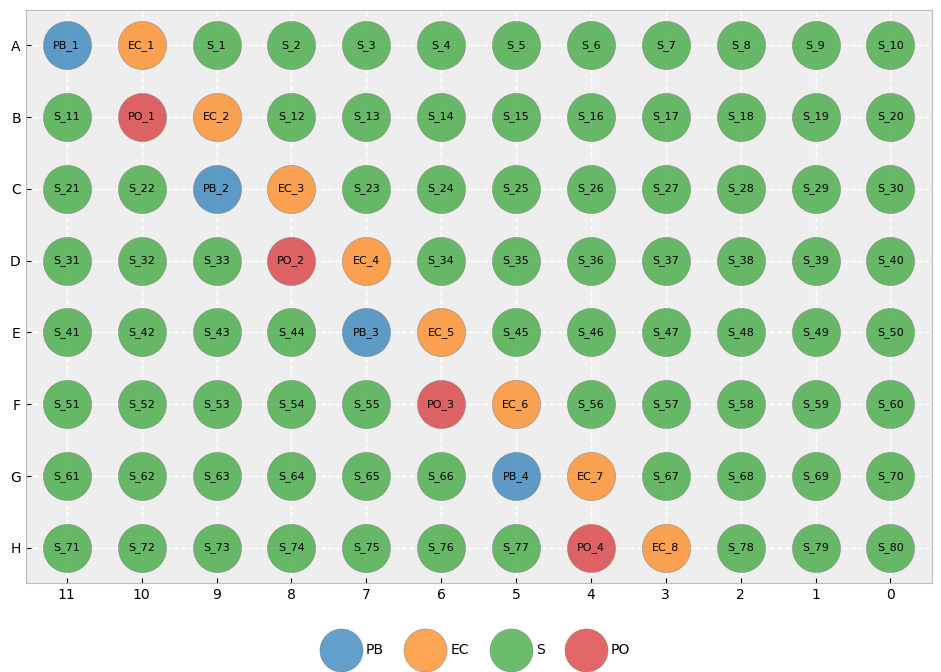

In [57]:
P = pl.Plate()

P.load_config_file("./config/plate_config.toml")
P.create_layout()
P.plot_layout(colormap='tab10')

## Load study data and randomize order 

In [52]:
datapath = "data/fake_case_control_Npairs_523_Ngroups_5.csv"
study = pd.read_csv(datapath, index_col=0)

study.set_index(["pair_ID", "specimen_ID"], inplace=True)
study.head()

object date_of_birth   barcode           organ
pair_ID specimen_ID                                                 
0       888          Control    1993-12-13  95388762  Parotid glands
        889             Case    1993-12-13  66794295  Parotid glands
1       962          Control    2006-06-22  69215322         Tendons
        963             Case    2006-06-22  77642424         Tendons
2       261          Control    1999-05-06  30225664  Parotid glands

In [53]:
# n_pairs = samples_df['Study_pair_ID'].max()
group_IDs = np.unique(study.index.get_level_values(0))

# Permute order in table
permutation_order = np.random.permutation(group_IDs)
study_permuted = study.loc[permutation_order].reset_index()

### Batches - distributing samples on plates

In [59]:
P.create_batches(study_permuted)


[    INFO] --- Finished distributing samples onto plates; 15 batches created.


Number of colors to use: 6


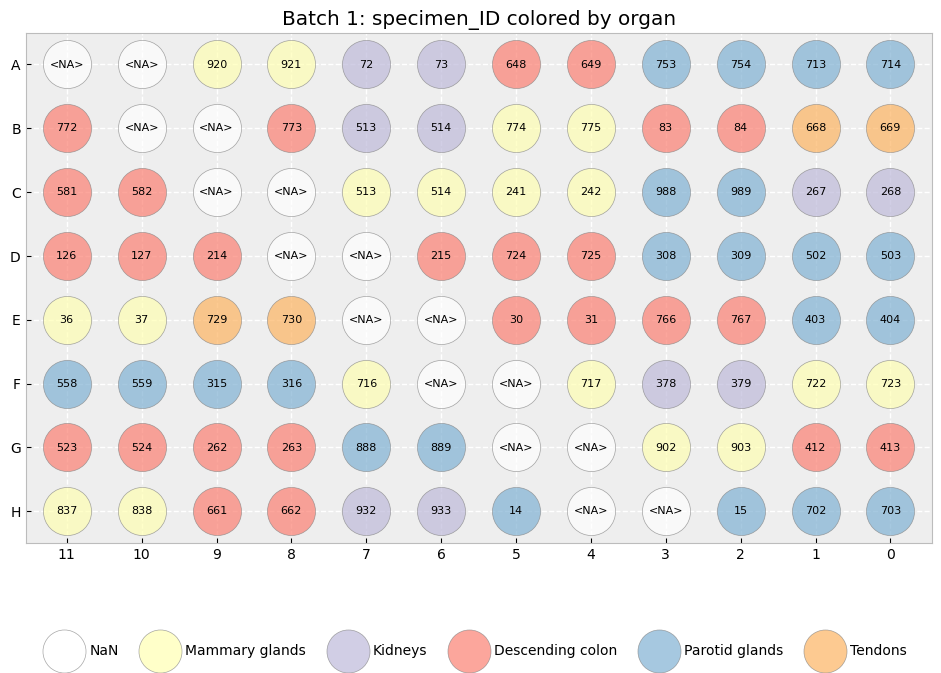

In [68]:
Pfig = P.plot_batch(0, "specimen_ID", "organ", label_dtype="Int64", colormap='Set3')

Number of colors to use: 6


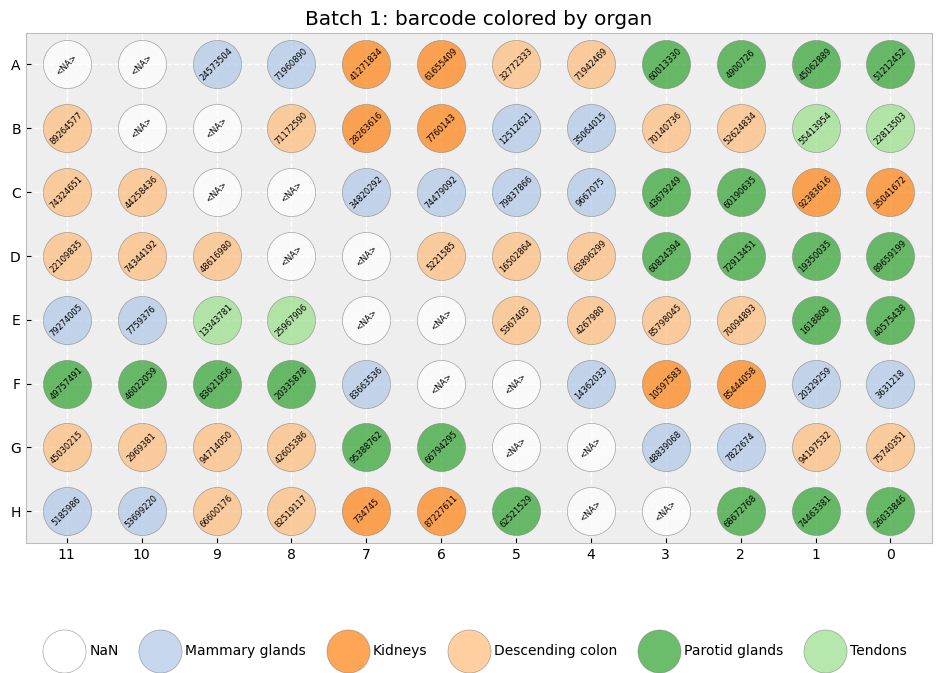

In [56]:
Pfig = P.plot_batch(0, "barcode", "organ", label_dtype="Int64", rotation=45, fontsize=6, colormap="Set3")
